# Import packages

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [2]:
# Fetch the MNIST dataset (this might take a moment the first time)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

data = np.concatenate((mnist.data, mnist.target.reshape(-1, 1)), axis=1)

n, m = np.shape(data)

np.random.shuffle(data)

# The data (pixel values) is in mnist.data
X = np.array(data[:, :784], dtype=float)

# normalize data
X = X / 255

# The labels (digits 0-9) are in mnist.target - convert to float
y = np.array(data[:, 784], dtype=float)  # Convert the labels to numeric type

print(f"Shape of the image data (X): {X.shape}")
print(f"Shape of the labels (y): {y.shape}")

Shape of the image data (X): (70000, 784)
Shape of the labels (y): (70000,)


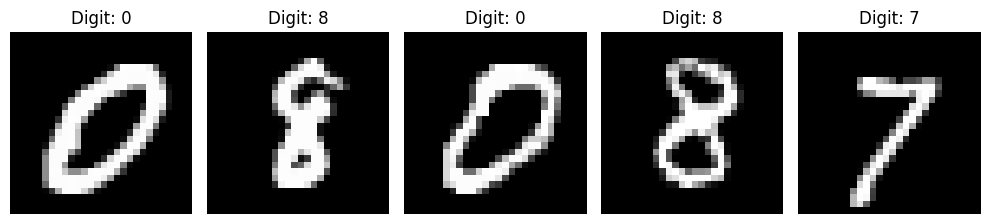

In [3]:
# To visualize sample images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Convert image data to float explicitly to avoid dtype issues
    img = X[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit: {int(y[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
def ReLu(x):
    """
    x : np.array representing a digit somewhere in the neural network
    """
    if type(x) is np.ndarray:
        x[x < 0] = 0
    return x 

x = np.array([0.1, 0.3, -0.3, -0.3, 0.8])

ReLu(x)

array([0.1, 0.3, 0. , 0. , 0.8])

In [5]:
def softmax(x):
    """
    x : np.array representing a digit somewhere in the neural network
    
    Used to compute the final output probabilities for each digit.
    """
    exp_x = np.exp(x)

    div = np.sum(exp_x)

    return exp_x / div 

softmax(x)

array([0.16543062, 0.20205741, 0.14968781, 0.14968781, 0.33313635])

In [14]:
def forward(x, W1, b1, W2, b2):
    """
    x : np.array of 784 pixels representing one 28x28 digit
    W : np.array of weight matrices for each layer in the network
    b : np.array of biases for each layer in the network
    """

    # hidden layer
    Z1 = W1 @ x + b1
    A1 = ReLu(Z1)
    
    # final layer
    Z2 = W2 @ A1 + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

In [ ]:
def binary(y):
    """
    y : np.array or np.float64 in case it is only one element. 
    We transform the desired output number which is saved in y 
    in a binary vector. 
    """

    # case, if we only test for one element of the y array
    if type(y) == np.float64: 
        y = np.array([y])

    num_samples = len(y)
    y = np.int32(y)
    repr = np.zeros((10, num_samples))
    repr[y, np.arange(num_samples)]=1.0
    return repr

print(binary(np.array([8, 2, 3])))

[8 2 3]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


In [55]:
def C(y_pred, y_actual):
    return (y_pred - y_actual) ** 2

# Prepare Data

In [7]:
# data points previously horizontal, now vertical
X_train = X[1000:].T
y_train = y[1000:]

X_test = X[:1000].T
y_test = y[:1000]

In [8]:
def init():  
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Test for first data point

[[0.00115948 0.00284837 0.01435698]
 [0.00202342 0.00125632 0.00499439]
 [0.00042186 0.00039455 0.00044899]
 [0.02131576 0.02282502 0.02362369]
 [0.37445422 0.04428975 0.10172336]
 [0.00420395 0.00266291 0.00185956]
 [0.00800947 0.03145911 0.10647659]
 [0.00786421 0.00443213 0.03069927]
 [0.07812469 0.08332726 0.01413223]
 [0.00655298 0.0026405  0.00141899]]
[8. 7. 9.]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


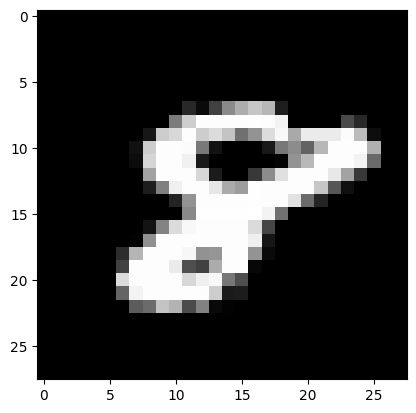

In [56]:
W1, b1, W2, b2 = init()

img = X_train[:,0].reshape(28, 28)
plt.imshow(img, cmap='gray')

Z1, A1, Z2, A2 = forward(X_train[:,0:3].reshape((784, 3)), W1, b1, W2, b2)

# output probabilities after initialization of first data point
print(A2)
y_actual = binary(y_train[0:3])

print(y_actual)

In [57]:
C(A2, y_actual)

array([[1.34438725e-06, 8.11320302e-06, 2.06122760e-04],
       [4.09422873e-06, 1.57834117e-06, 2.49438928e-05],
       [1.77963592e-07, 1.55669637e-07, 2.01593799e-07],
       [4.54361730e-04, 5.20981756e-04, 5.58078668e-04],
       [1.40215962e-01, 1.96158235e-03, 1.03476421e-02],
       [1.76731683e-05, 7.09110867e-06, 3.45797042e-06],
       [6.41515392e-05, 9.89675802e-04, 1.13372636e-02],
       [6.18457479e-05, 9.91155389e-01, 9.42445307e-04],
       [8.49854079e-01, 6.94343267e-03, 1.99719827e-04],
       [4.29415247e-05, 6.97223564e-06, 9.97164039e-01]])